In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.externals import joblib
import pickle
from sklearn import svm

In [333]:
test = pd.read_csv("sample_submission.csv")
visit = pd.read_csv("air_visit_data.csv")
air_info = pd.read_csv('air_store_info.csv')

In [334]:
#Initial air_info
city = [x.split(' ')[0] for x in air_info.air_area_name]
district = [x.split(' ')[1] for x in air_info.air_area_name]
air_info['city'] = city
air_info['district'] = district
air_info.drop(['air_area_name','latitude','longitude'],axis=1,inplace=True)
air_info.head()

,air_store_id,air_genre_name,city,district
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken,Kōbe-shi
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken,Kōbe-shi
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken,Kōbe-shi
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken,Kōbe-shi
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to,Minato-ku


In [335]:
#Initial visit
visit["visit_date"]=pd.to_datetime(visit["visit_date"])
new_col = [1 for x in visit["visit_date"]]
visit["one"] = new_col
visit.head()

,air_store_id,visit_date,visitors,one
0,air_ba937bf13d40fb24,2016-01-13,25,1
1,air_ba937bf13d40fb24,2016-01-14,32,1
2,air_ba937bf13d40fb24,2016-01-15,29,1
3,air_ba937bf13d40fb24,2016-01-16,22,1
4,air_ba937bf13d40fb24,2016-01-18,6,1


In [336]:
#Merge
visit2 = visit.merge(air_info,how='inner')
visit2["visit_date"]=pd.to_datetime(visit2["visit_date"])

In [337]:
visit2.head()

,air_store_id,visit_date,visitors,one,air_genre_name,city,district
0,air_ba937bf13d40fb24,2016-01-13,25,1,Dining bar,Tōkyō-to,Minato-ku
1,air_ba937bf13d40fb24,2016-01-14,32,1,Dining bar,Tōkyō-to,Minato-ku
2,air_ba937bf13d40fb24,2016-01-15,29,1,Dining bar,Tōkyō-to,Minato-ku
3,air_ba937bf13d40fb24,2016-01-16,22,1,Dining bar,Tōkyō-to,Minato-ku
4,air_ba937bf13d40fb24,2016-01-18,6,1,Dining bar,Tōkyō-to,Minato-ku


In [233]:
# Generate the sample data set
#label
visit_target = visit2[visit2["visit_date"]>=pd.to_datetime("2017-02-01")]
visit_target["date"]=visit_target["visit_date"]-pd.to_datetime("2017-02-01")
visit_target.rename(columns={'visitors':'label'},inplace=True)
visit_target.reset_index(inplace=True)
visit_target.head()

/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Fermat/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,index,air_store_id,visit_date,label,one,air_genre_name,city,district,date
0,316,air_ba937bf13d40fb24,2017-02-01,10,1,Dining bar,Tōkyō-to,Minato-ku,0 days
1,317,air_ba937bf13d40fb24,2017-02-02,19,1,Dining bar,Tōkyō-to,Minato-ku,1 days
2,318,air_ba937bf13d40fb24,2017-02-03,54,1,Dining bar,Tōkyō-to,Minato-ku,2 days
3,319,air_ba937bf13d40fb24,2017-02-04,30,1,Dining bar,Tōkyō-to,Minato-ku,3 days
4,320,air_ba937bf13d40fb24,2017-02-05,3,1,Dining bar,Tōkyō-to,Minato-ku,4 days


In [235]:
#sample
visit_sample = visit2[(visit2.visit_date>=pd.to_datetime("2016-02-03")) & (visit2.visit_date<=pd.to_datetime("2016-04-23"))]
visit_sample["visit_date"] = visit_sample["visit_date"]-pd.to_datetime("2016-02-03")
visit_sample.reset_index(inplace=True)
visit_sample.head()

/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,air_store_id,visit_date,visitors,one,air_genre_name,city,district
0,16,air_ba937bf13d40fb24,0 days,18,1,Dining bar,Tōkyō-to,Minato-ku
1,17,air_ba937bf13d40fb24,1 days,12,1,Dining bar,Tōkyō-to,Minato-ku
2,18,air_ba937bf13d40fb24,2 days,45,1,Dining bar,Tōkyō-to,Minato-ku
3,19,air_ba937bf13d40fb24,3 days,15,1,Dining bar,Tōkyō-to,Minato-ku
4,20,air_ba937bf13d40fb24,5 days,19,1,Dining bar,Tōkyō-to,Minato-ku


In [236]:
#Group by Date
Date_Group = visit_sample.groupby('visit_date')['visitors'].mean()
Date_Group_df = Date_Group.to_frame()

In [237]:
#Group by Date&Genre
Genre_Group = visit_sample.groupby(['visit_date','air_genre_name'])['visitors'].mean()
Genre_Group_df = Genre_Group.to_frame()

In [238]:
#Group by city
City_Group = visit_sample.groupby(['visit_date','city'])['visitors'].mean()
City_Group_df = City_Group.to_frame()

In [240]:
#Group by district
District_Group = visit_sample.groupby(['visit_date','district'])['visitors'].mean()
District_Group_df = District_Group.to_frame()

In [242]:
visit_target.drop("index",axis=1,inplace=True)
visit_target.head()

/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,air_store_id,visit_date,label,one,air_genre_name,city,district,date
0,air_ba937bf13d40fb24,2017-02-01,10,1,Dining bar,Tōkyō-to,Minato-ku,0 days
1,air_ba937bf13d40fb24,2017-02-02,19,1,Dining bar,Tōkyō-to,Minato-ku,1 days
2,air_ba937bf13d40fb24,2017-02-03,54,1,Dining bar,Tōkyō-to,Minato-ku,2 days
3,air_ba937bf13d40fb24,2017-02-04,30,1,Dining bar,Tōkyō-to,Minato-ku,3 days
4,air_ba937bf13d40fb24,2017-02-05,3,1,Dining bar,Tōkyō-to,Minato-ku,4 days


In [266]:
Genre_Group.get(visit_target.date[0],visit_target.air_genre_name[0])

air_genre_name
Bar/Cocktail                    13.037037
Cafe/Sweets                     20.537037
Creative cuisine                13.750000
Dining bar                      14.903226
Italian/French                  16.636364
Izakaya                         16.736111
Japanese food                   18.521739
Okonomiyaki/Monja/Teppanyaki    14.666667
Other                           25.600000
Western food                    28.000000
Yakiniku/Korean food            16.714286
Name: visitors, dtype: float64

In [269]:
newcols = [Date_Group[x] for x in visit_target.date]
visit_target["Date_Group"] = newcols
newcols = [Genre_Group[visit_target.date[x]].get(visit_target.air_genre_name[x],Date_Group[visit_target.date[x]]) for x in range(visit_target.shape[0])]
visit_target["Genre_Group"] = newcols

/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [272]:
newcols = [City_Group[visit_target.date[x]].get(visit_target.city[x],Date_Group[visit_target.date[x]]) for x in range(visit_target.shape[0])]
visit_target["City_Group"] = newcols
newcols = [District_Group[visit_target.date[x]].get(visit_target.district[x],Date_Group[visit_target.date[x]]) for x in range(visit_target.shape[0])]
visit_target["District_Group"] = newcols

/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [273]:
visit_target.isnull().sum()

air_store_id      0
visit_date        0
label             0
one               0
air_genre_name    0
city              0
district          0
date              0
Date_Group        0
Genre_Group       0
City_Group        0
District_Group    0
dtype: int64

In [274]:
visit_target.head()

,air_store_id,visit_date,label,one,air_genre_name,city,district,date,Date_Group,Genre_Group,City_Group,District_Group
0,air_ba937bf13d40fb24,2017-02-01,10,1,Dining bar,Tōkyō-to,Minato-ku,0 days,17.488806,14.903226,17.798561,21.550000
1,air_ba937bf13d40fb24,2017-02-02,19,1,Dining bar,Tōkyō-to,Minato-ku,1 days,17.911032,14.411765,18.780822,19.368421
2,air_ba937bf13d40fb24,2017-02-03,54,1,Dining bar,Tōkyō-to,Minato-ku,2 days,22.369492,20.942857,22.467105,26.400000
3,air_ba937bf13d40fb24,2017-02-04,30,1,Dining bar,Tōkyō-to,Minato-ku,3 days,27.271127,24.916667,26.020979,21.578947
4,air_ba937bf13d40fb24,2017-02-05,3,1,Dining bar,Tōkyō-to,Minato-ku,4 days,23.741627,20.193548,22.693069,17.375000


In [279]:
sample = visit_target[['Date_Group','Genre_Group','City_Group','District_Group']].values.tolist()
label = visit_target['label'].values.tolist()

In [287]:
clf = svm.SVR()
clf.fit(sample,label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [338]:
visit_test = visit2[(visit2.visit_date>=pd.to_datetime("2016-04-24")) & (visit2.visit_date<=pd.to_datetime("2016-06-01"))]
visit_test["visit_date"] = visit_test["visit_date"]-pd.to_datetime("2016-04-24")
visit_test.reset_index(inplace=True)
visit_test.drop("index",axis=1,inplace=True)
visit_test.head()

/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Fermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,air_store_id,visit_date,visitors,one,air_genre_name,city,district
0,air_ba937bf13d40fb24,1 days,29,1,Dining bar,Tōkyō-to,Minato-ku
1,air_ba937bf13d40fb24,2 days,19,1,Dining bar,Tōkyō-to,Minato-ku
2,air_ba937bf13d40fb24,3 days,9,1,Dining bar,Tōkyō-to,Minato-ku
3,air_ba937bf13d40fb24,4 days,26,1,Dining bar,Tōkyō-to,Minato-ku
4,air_ba937bf13d40fb24,6 days,12,1,Dining bar,Tōkyō-to,Minato-ku


In [339]:
#Group by Date
Date_Group_test = visit_test.groupby('visit_date')['visitors'].mean()
#Group by Date&Genre
Genre_Group_test = visit_test.groupby(['visit_date','air_genre_name'])['visitors'].mean()
#Group by city
City_Group_test = visit_test.groupby(['visit_date','city'])['visitors'].mean()
#Group by district
District_Group_test = visit_test.groupby(['visit_date','district'])['visitors'].mean()

In [340]:
#Initial test
date = [pd.to_datetime(x.split('_')[2])-pd.to_datetime("2017-04-23") for x in test.id]
air_id = [x.split('_')[0]+'_'+x.split('_')[1] for x in test.id]
test["date"] = date
test["air_store_id"] = air_id
new_test = test.merge(air_info,how='inner')

In [341]:
new_test

,id,visitors,date,air_store_id,air_genre_name,city,district
0,air_00a91d42b08b08d9_2017-04-23,0,0 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
1,air_00a91d42b08b08d9_2017-04-24,0,1 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
2,air_00a91d42b08b08d9_2017-04-25,0,2 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
3,air_00a91d42b08b08d9_2017-04-26,0,3 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
4,air_00a91d42b08b08d9_2017-04-27,0,4 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
5,air_00a91d42b08b08d9_2017-04-28,0,5 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
6,air_00a91d42b08b08d9_2017-04-29,0,6 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
7,air_00a91d42b08b08d9_2017-04-30,0,7 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
8,air_00a91d42b08b08d9_2017-05-01,0,8 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku
9,air_00a91d42b08b08d9_2017-05-02,0,9 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku


In [342]:
newcols = [Date_Group_test[x] for x in new_test.date]
new_test["Date_Group"] = newcols
newcols = [Genre_Group_test[new_test.date[x]].get(new_test.air_genre_name[x],Date_Group_test[new_test.date[x]]) for x in range(new_test.shape[0])]
new_test["Genre_Group"] = newcols
newcols = [City_Group_test[new_test.date[x]].get(new_test.city[x],Date_Group_test[new_test.date[x]]) for x in range(new_test.shape[0])]
new_test["City_Group"] = newcols
newcols = [District_Group_test[new_test.date[x]].get(new_test.district[x],Date_Group_test[new_test.date[x]]) for x in range(new_test.shape[0])]
new_test["District_Group"] = newcols

In [343]:
new_test.head()

,id,visitors,date,air_store_id,air_genre_name,city,district,Date_Group,Genre_Group,City_Group,District_Group
0,air_00a91d42b08b08d9_2017-04-23,0,0 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku,24.557078,23.629630,23.427273,23.333333
1,air_00a91d42b08b08d9_2017-04-24,0,1 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku,18.152893,19.791667,18.344262,28.857143
2,air_00a91d42b08b08d9_2017-04-25,0,2 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku,20.435714,18.555556,20.046358,26.857143
3,air_00a91d42b08b08d9_2017-04-26,0,3 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku,20.017606,20.300000,20.899329,30.714286
4,air_00a91d42b08b08d9_2017-04-27,0,4 days,air_00a91d42b08b08d9,Italian/French,Tōkyō-to,Chiyoda-ku,23.363636,23.085714,22.606452,36.142857


In [344]:
test_set = new_test[['Date_Group','Genre_Group','City_Group','District_Group']].values.tolist()

In [346]:
out = clf.predict(test_set)

In [349]:
submit = pd.read_csv("sample_submission.csv")
submit["visitors"] = pd.Series(out)
submit.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,18.916527
1,air_00a91d42b08b08d9_2017-04-24,20.435270
2,air_00a91d42b08b08d9_2017-04-25,18.487514
3,air_00a91d42b08b08d9_2017-04-26,18.857854
4,air_00a91d42b08b08d9_2017-04-27,20.912443


In [351]:
submit.to_csv('submit.csv',index=False)
joblib.dump(clf, 'zzw_first.pkl') 

['zzw_first.pkl']

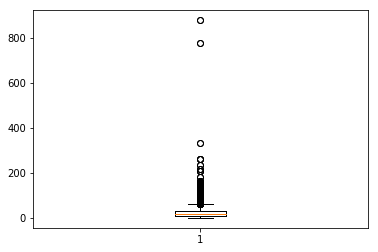

In [353]:
plt.boxplot(label)
plt.show()